In [0]:
import os, sys



In [0]:
from google.colab import drive

In [4]:
drive.mount("/content/drive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
os.chdir("/content/drive/My Drive/MACE")
sys.path.append("/content/drive/My Drive/MACE")

In [6]:
!pwd

/content/drive/My Drive/MACE


In [0]:
#%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

#from matplotlib import pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

In [0]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

13


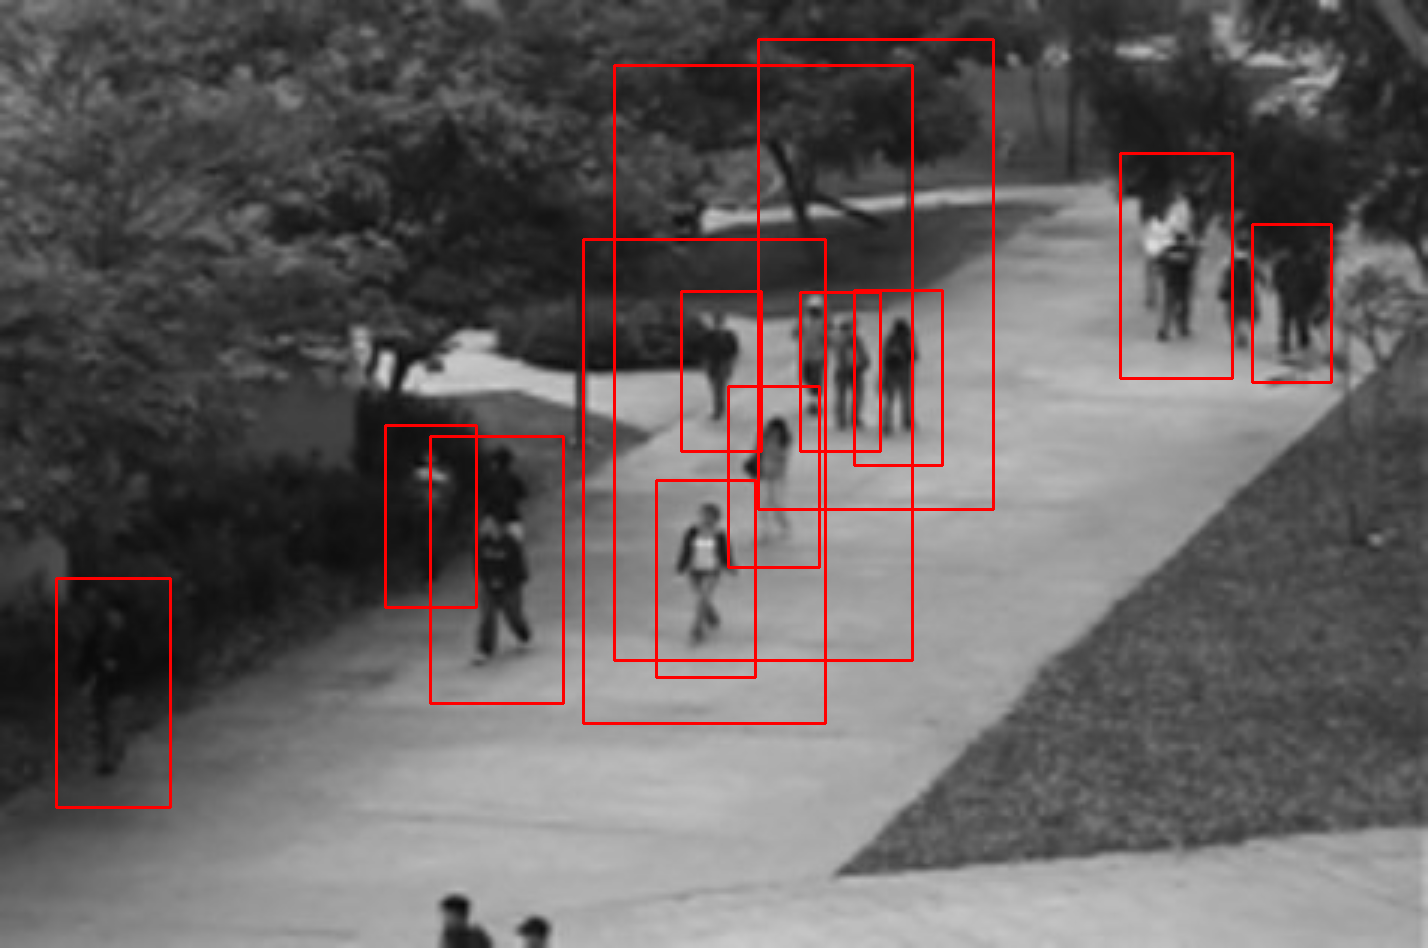

In [9]:
image = cv2.imread("184.jpg")
image = cv2.resize(image, (3*476,3*316))
orig = image.copy()
 
# detect people in the image
(rects, weights) = hog.detectMultiScale(image, winStride=(4, 4),padding=(8, 8), scale=1.03)
 
# draw the original bounding boxes
for (x, y, w, h) in rects:
  cv2.rectangle(orig, (x, y), (x + w, y + h), (0, 0, 255), 2)
 

 
# show some information on the number of bounding boxes
#filename = imagePath[imagePath.rfind("/") + 1:]
#print("[INFO] {}: {} original boxes, {} after suppression".format(
#filename, len(rects), len(pick)))
print(len(rects)) 

# show the output images
cv2_imshow(orig)


In [0]:
!pip install imutils

In [0]:
from imutils.object_detection import non_max_suppression
import numpy as np

8


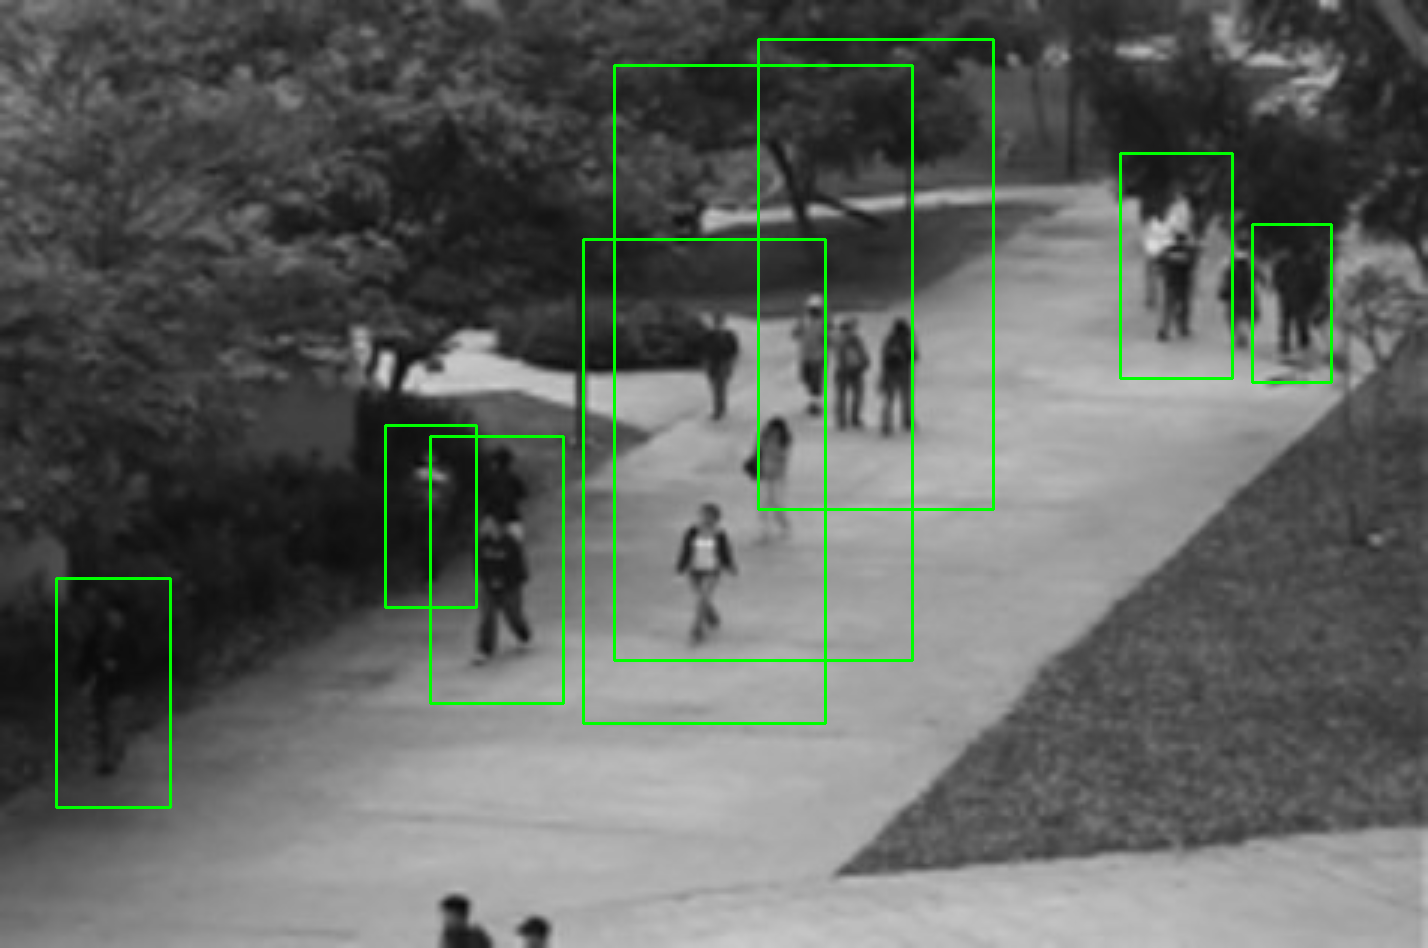

In [11]:
# apply non-maxima suppression to the bounding boxes using a
# fairly large overlap threshold to try to maintain overlapping
# boxes that are still people


rects = np.array([[x, y, x + w, y + h] for (x, y, w, h) in rects])
pick = non_max_suppression(rects, probs=None, overlapThresh=0.8)

print(len(pick))
 
# draw the final bounding boxes
for (xA, yA, xB, yB) in pick:
  cv2.rectangle(image, (xA, yA), (xB, yB), (0, 255, 0), 2)

cv2_imshow(image)
